# library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score

/var/folders/22/gxvfn3cx2_v64ngzhq52h2180000gn/T/ipykernel_23096/1004059418.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# for 2012

In [2]:
df_2012 = pd.read_csv('clean_BPI_2012.csv')

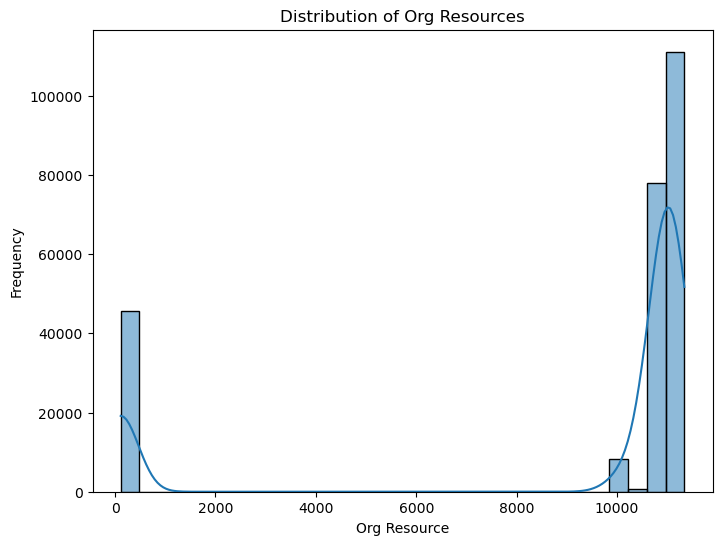

In [3]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_2012, x='org:resource', bins=30, kde=True)
plt.title('Distribution of Org Resources')
plt.xlabel('Org Resource')
plt.ylabel('Frequency')
plt.show()


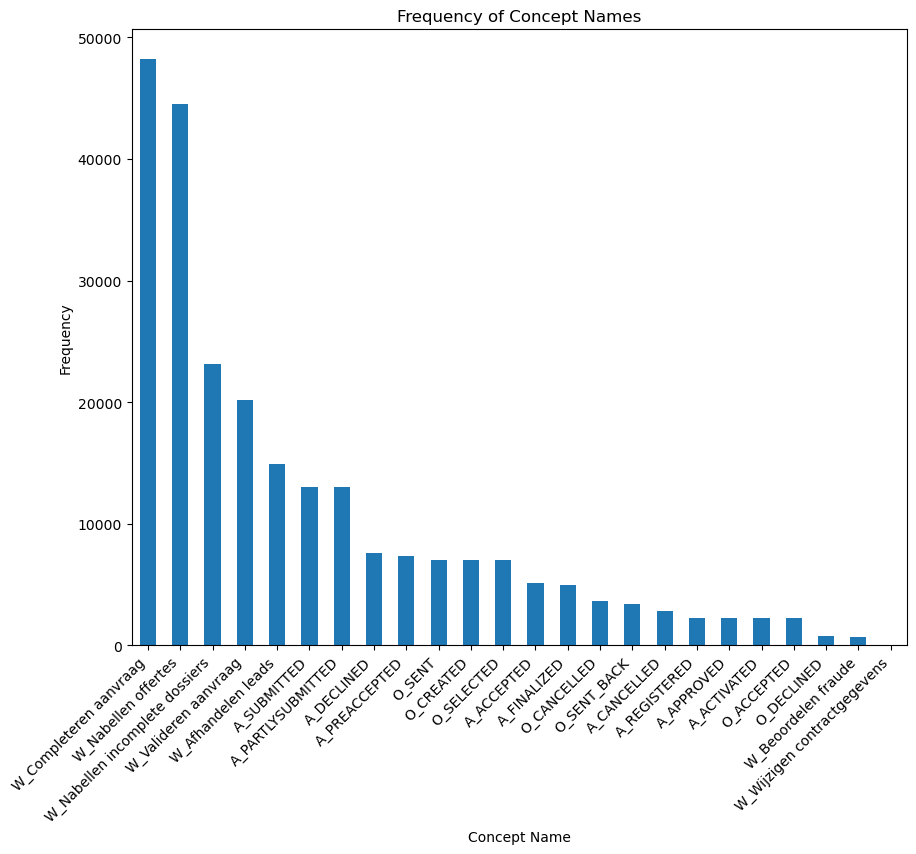

In [4]:
plt.figure(figsize=(10, 8))
df_2012['concept:name'].value_counts().plot(kind='bar')
plt.title('Frequency of Concept Names')
plt.xlabel('Concept Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.show()


## LinearRegression on time & LogisticRegression on concept

In [5]:
# Convert 'time:timestamp' from string to datetime
df_2012['time:timestamp'] = pd.to_datetime(df_2012['time:timestamp'], errors='coerce')

# Extract features from 'time:timestamp'
df_2012['hour'] = df_2012['time:timestamp'].dt.hour
df_2012['day_of_week'] = df_2012['time:timestamp'].dt.dayofweek

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df_2012.columns:
    df_2012.drop(columns=['Unnamed: 0'], inplace=True)
    
    
# Encode categorical variables
label_encoders = {}
for column in ['case:concept:name', 'concept:name', 'lifecycle:transition', 'org:resource']:
    le = LabelEncoder()
    df_2012[column] = le.fit_transform(df_2012[column])
    label_encoders[column] = le

# Define features and target for classification
X_concept = df_2012.drop(columns=['concept:name', 'time:timestamp']).select_dtypes(include=[np.number])
y_concept = df_2012['concept:name']

# Define features and target for regression
X_time = df_2012.drop(columns=['time:timestamp']).select_dtypes(include=[np.number])
y_time = (df_2012['time:timestamp'] - df_2012['time:timestamp'].min()).dt.total_seconds()

# Handling missing values with imputation
imputer = SimpleImputer(strategy='mean')
X_concept = imputer.fit_transform(X_concept)
X_time = imputer.fit_transform(X_time)

# Feature scaling
scaler = StandardScaler()
X_concept_scaled = scaler.fit_transform(X_concept)
X_time_scaled = scaler.fit_transform(X_time)

# Splitting datasets for training and testing
X_train_concept, X_test_concept, y_train_concept, y_test_concept = train_test_split(X_concept_scaled, y_concept, test_size=0.2, random_state=42)
X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(X_time_scaled, y_time, test_size=0.2, random_state=42)

# Classification model
classifier = LogisticRegression(max_iter=10000, class_weight='balanced', solver='saga')
classifier.fit(X_train_concept, y_train_concept)
y_pred_concept = classifier.predict(X_test_concept)

# Regression model
regressor = LinearRegression()
regressor.fit(X_train_time, y_train_time)
y_pred_time = regressor.predict(X_test_time)

# Evaluating the classification model
accuracy = accuracy_score(y_test_concept, y_pred_concept)
precision = precision_score(y_test_concept, y_pred_concept, average='macro')
recall = recall_score(y_test_concept, y_pred_concept, average='macro')
f1 = f1_score(y_test_concept, y_pred_concept, average='macro')

# Evaluating the regression model
mae = mean_absolute_error(y_test_time, y_pred_time)
mse = mean_squared_error(y_test_time, y_pred_time)
r2 = r2_score(y_test_time, y_pred_time)


# Output the evaluation results
print("Classification on concept Metrics:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}\n")
print("Regression on time Metrics:")
print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, R2: {r2:.4f}")


Classification on concept Metrics:
Accuracy: 0.1461, Precision: 0.1200, Recall: 0.1706, F1 Score: 0.0996

Regression on time Metrics:
MAE: 647498.8735, MSE: 795463376687.8326, R2: 0.9468


# for 2017

In [6]:
df_2017 = pd.read_csv('clean_BPI_2017.csv')

/var/folders/x_/q8m53n9s7qj76786p5830ldh0000gn/T/ipykernel_47768/3148042513.py:1: DtypeWarning: Columns (14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2017 = pd.read_csv('clean_BPI_2017.csv')


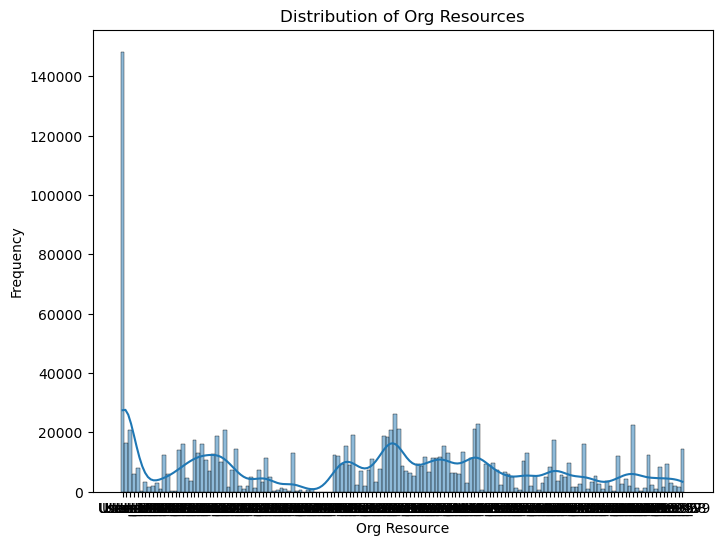

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_2017, x='org:resource', bins=30, kde=True)
plt.title('Distribution of Org Resources')
plt.xlabel('Org Resource')
plt.ylabel('Frequency')
plt.show()


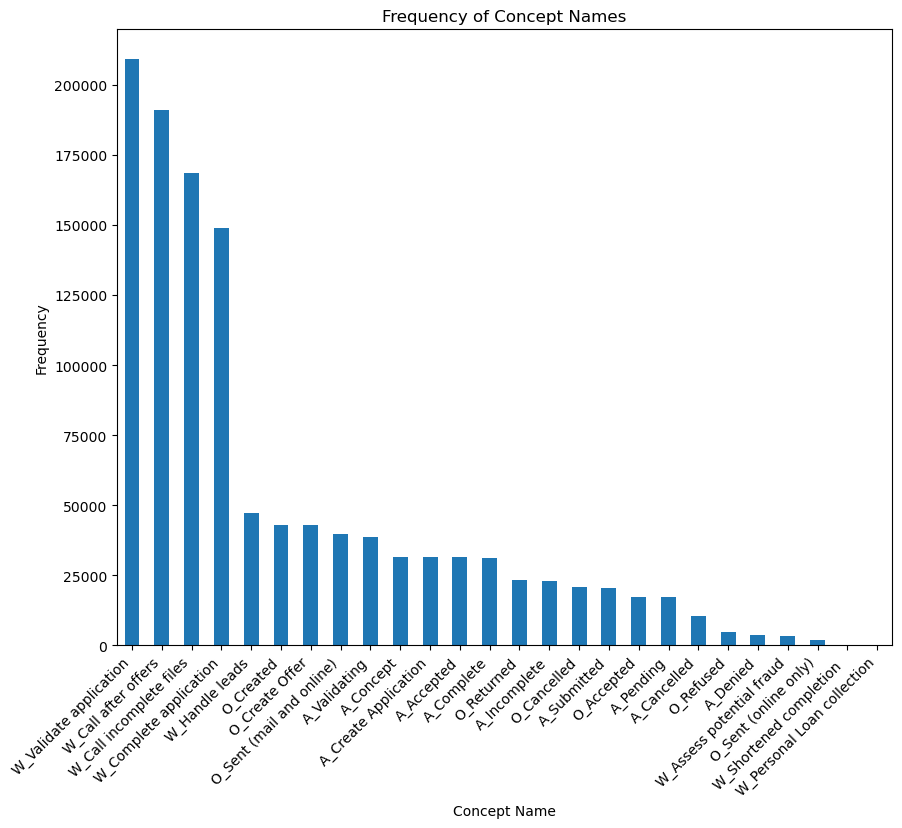

In [8]:
plt.figure(figsize=(10, 8))
df_2017['concept:name'].value_counts().plot(kind='bar')
plt.title('Frequency of Concept Names')
plt.xlabel('Concept Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.show()


## LinearRegression on time & LogisticRegression on concept

In [9]:
# Convert 'time:timestamp' from string to datetime
df_2017['time:timestamp'] = pd.to_datetime(df_2017['time:timestamp'], errors='coerce')

# Extract features from 'time:timestamp'
df_2017['hour'] = df_2017['time:timestamp'].dt.hour
df_2017['day_of_week'] = df_2017['time:timestamp'].dt.dayofweek

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df_2017.columns:
    df_2017.drop(columns=['Unnamed: 0'], inplace=True)
    
    
# Encode categorical variables
label_encoders = {}
for column in ['case:concept:name', 'concept:name', 'lifecycle:transition', 'org:resource']:
    le = LabelEncoder()
    df_2017[column] = le.fit_transform(df_2017[column])
    label_encoders[column] = le

# Define features and target for classification
X_concept = df_2017.drop(columns=['concept:name', 'time:timestamp']).select_dtypes(include=[np.number])
y_concept = df_2017['concept:name']

# Define features and target for regression
X_time = df_2017.drop(columns=['time:timestamp']).select_dtypes(include=[np.number])
y_time = (df_2017['time:timestamp'] - df_2017['time:timestamp'].min()).dt.total_seconds()

# Handling missing values with imputation
imputer = SimpleImputer(strategy='mean')
X_concept = imputer.fit_transform(X_concept)
X_time = imputer.fit_transform(X_time)

# Feature scaling
scaler = StandardScaler()
X_concept_scaled = scaler.fit_transform(X_concept)
X_time_scaled = scaler.fit_transform(X_time)

# Splitting datasets for training and testing
X_train_concept, X_test_concept, y_train_concept, y_test_concept = train_test_split(X_concept_scaled, y_concept, test_size=0.2, random_state=42)
X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(X_time_scaled, y_time, test_size=0.2, random_state=42)

# Classification model
classifier = LogisticRegression(max_iter=10000, class_weight='balanced', solver='saga')
classifier.fit(X_train_concept, y_train_concept)
y_pred_concept = classifier.predict(X_test_concept)

# Regression model
regressor = LinearRegression()
regressor.fit(X_train_time, y_train_time)
y_pred_time = regressor.predict(X_test_time)

# Evaluating the classification model
accuracy = accuracy_score(y_test_concept, y_pred_concept)
precision = precision_score(y_test_concept, y_pred_concept, average='macro')
recall = recall_score(y_test_concept, y_pred_concept, average='macro')
f1 = f1_score(y_test_concept, y_pred_concept, average='macro')

# Evaluating the regression model
mae = mean_absolute_error(y_test_time, y_pred_time)
mse = mean_squared_error(y_test_time, y_pred_time)
r2 = r2_score(y_test_time, y_pred_time)


# Output the evaluation results
print("Classification on concept Metrics:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}\n")
print("Regression on time Metrics:")
print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, R2: {r2:.4f}")


Classification on concept Metrics:
Accuracy: 0.1388, Precision: 0.1450, Recall: 0.2310, F1 Score: 0.1032

Regression on time Metrics:
MAE: 7555369.2292, MSE: 78270403082840.7344, R2: 0.0103
